# 420 Imanes

In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns  
from scipy.stats import gaussian_kde

In [21]:
dir = 'test.csv'
data = pd.read_csv(dir, sep=';', decimal=',')
data['Numero de Caja'] = None    
data['B Absoluto (mT)'] = None
data['Dia Medido'] = None

In [22]:
delta_1 = 5.92 - 5.82 
delta_2 = 6.16 - 5.92


data['B Absoluto (mT)'][0] = data['B (mT)'][0] - delta_1 
data['B Absoluto (mT)'][1] = data['B (mT)'][1] - delta_1 
data['Dia Medido'][0] = 1
data['Dia Medido'][1] = 1

for i in range(2, 140):
    data['B Absoluto (mT)'][i] = data['B (mT)'][i]
    data['Dia Medido'][i] = 1

for i in range(140, len(data['B (mT)'])):
    #data['B Absoluto (mT)'][i] = data['B (mT)'][i] + delta_2 + 0.076 
    data['B Absoluto (mT)'][i] = data['B (mT)'][i] + delta_2
    data['Dia Medido'][i] = 2

pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas

/tmp/ipykernel_90078/610522974.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['B Absoluto (mT)'][0] = data['B (mT)'][0] - delta_1
/tmp/ipykernel_90078/610522974.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [4]:
primera_tanda_steps = 10
segunda_tanda_steps = 20
list_aux = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6']

for i in range(0, 140, primera_tanda_steps):
    for j in range(primera_tanda_steps):
        # Usar loc para asignar valores
        data.loc[i + j, 'Numero de Caja'] = list_aux[i // primera_tanda_steps]

for i in range(140, 420, segunda_tanda_steps):
    for j in range(segunda_tanda_steps):
        # Usar loc para asignar valores
        data.loc[i + j, 'Numero de Caja'] = list_aux[(i // segunda_tanda_steps) - 7]

# Ajustar las opciones para mostrar toda la tabla
pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas

In [5]:
campos_magneticos = data['B Absoluto (mT)'].to_numpy()
data.head(1)

,Station N.,Date,Time,Magnet ID,B (mT),Zero (mT),Numero de Caja,B Absoluto (mT),Dia Medido
0,1,Wed Jan 8 2025,12:07:13,31,9.82,5.92,A1,9.72,1


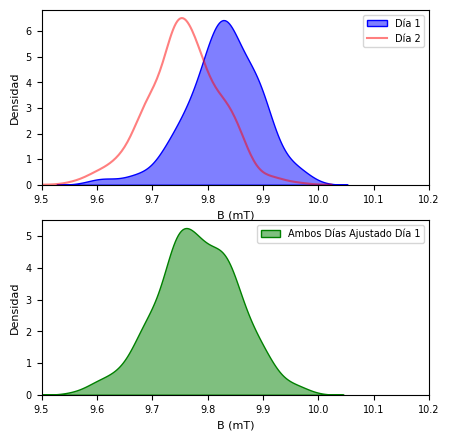

In [6]:
ajust = 0.076

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(5, 5))  

sns.kdeplot(campos_magneticos[0:140], fill=True, color='blue', label='Día 1', alpha=0.5, ax=ax1)
sns.kdeplot(campos_magneticos[140:420], fill=False, color='red', label='Día 2', alpha=0.5, ax=ax1)
sns.kdeplot(campos_magneticos, fill=True, color='green', label='Ambos Días Ajustado Día 1', alpha=0.5, ax=ax2, common_norm=False)

# Añadir detalles
for ax in [ax1, ax2]:
    ax.set_xlabel('B (mT)', fontsize=8)
    ax.set_ylabel('Densidad', fontsize=8)
    ax.set_xlim(9.5, 10.2)
    ax.tick_params(axis='both', which='major', labelsize=7)
    ax.tick_params(axis='both', which='minor', labelsize=7)

ax1.legend(loc='upper right', fontsize=7)
ax2.legend(loc='upper right', fontsize=7)

plt.savefig('density.png', dpi=500)  


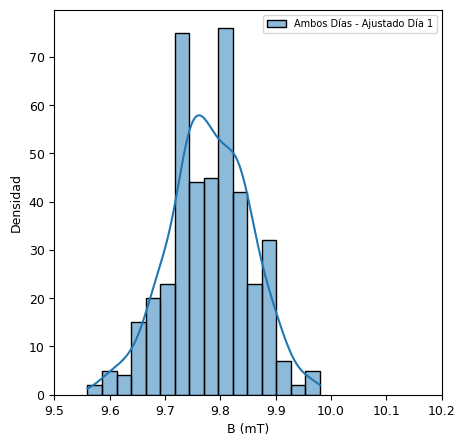

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))  
bins = 22

#ax.hist(campos_magneticos, bins = bins, label = "Ambos Días Ajustado Día 1", color='green', alpha=0.9, density = False)
df_B = pd.DataFrame(campos_magneticos)
sns.histplot(df_B, kde=True, label = "Ambos Días - Ajustado Día 1")
ax.set_xlabel('B (mT)', fontsize=9)
ax.set_ylabel('Densidad', fontsize=9)
ax.set_xlim(9.5, 10.2)
ax.tick_params(axis='both', which='major', labelsize=9)
ax.tick_params(axis='both', which='minor', labelsize=9)
ax.legend(loc='upper right', fontsize=7)

plt.savefig('hist.png', dpi=500)  # Guardar con alta resolución

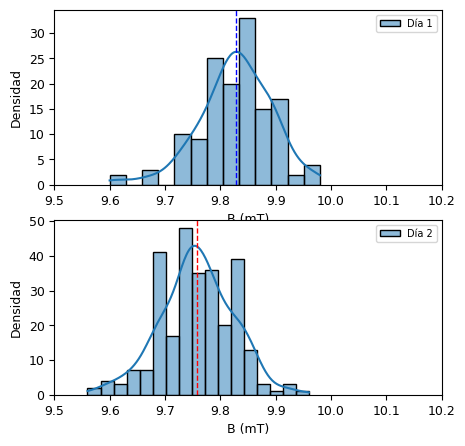

In [8]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(5, 5))  
bins = 22

#ax.hist(campos_magneticos, bins = bins, label = "Ambos Días Ajustado Día 1", color='green', alpha=0.9, density = False)
df_B_dia1 = pd.DataFrame(campos_magneticos[0:140])
mean_dia1 = np.mean(campos_magneticos[0:140])
df_B_dia2 = pd.DataFrame(campos_magneticos[140:420])
mean_dia2 = np.mean(campos_magneticos[140:420])
sns.histplot(df_B_dia1, kde=True, label = "Día 1", ax = ax1)
sns.histplot(df_B_dia2, kde=True, label = "Día 2", ax = ax2)

ax1.axvline(mean_dia1, color='blue', linestyle='dashed', linewidth=1)
ax2.axvline(mean_dia2, color='red', linestyle='dashed', linewidth=1)

for ax in [ax1, ax2]:
    ax.set_xlabel('B (mT)', fontsize=9)
    ax.set_ylabel('Densidad', fontsize=9)
    ax.set_xlim(9.5, 10.2)
    ax.tick_params(axis='both', which='major', labelsize=9)
    ax.tick_params(axis='both', which='minor', labelsize=9)
    ax.legend(loc='upper right', fontsize=7)

#plt.savefig('hist.png', dpi=500)  # Guardar con alta resolución

In [17]:
# Calcular las medias de los días 1 y 2
mean_dia1 = data[data['Dia Medido'] == 1]['B Absoluto (mT)'].mean()
mean_dia2 = data[data['Dia Medido'] == 2]['B Absoluto (mT)'].mean()

# Calcular las distancias y almacenar índices
index_mas_cercanos_dia1 = []
index_mas_cercanos_dia2 = []

for i in range(len(data)):
    if data['Dia Medido'][i] == 1:
        dist = data['B Absoluto (mT)'][i] - mean_dia1
        index_mas_cercanos_dia1.append((abs(dist), i))  # Guardar la distancia y el índice
    elif data['Dia Medido'][i] == 2:
        dist = data['B Absoluto (mT)'][i] - mean_dia2
        index_mas_cercanos_dia2.append((abs(dist), i))  # Guardar la distancia y el índice

# Ordenar las listas por la distancia
index_mas_cercanos_dia1.sort(key=lambda x: x[0])  # Ordenar por la primera posición (distancia)
index_mas_cercanos_dia2.sort(key=lambda x: x[0])

# Seleccionar los primeros 30 elementos más cercanos
indices_30_cercanos_dia1 = [x[1] for x in index_mas_cercanos_dia1[:30]]
indices_30_cercanos_dia2 = [x[1] for x in index_mas_cercanos_dia2[:30]]

# Obtener los datos correspondientes a esos índices
valores_cercanos_dia1 = data.iloc[indices_30_cercanos_dia1]
valores_cercanos_dia2 = data.iloc[indices_30_cercanos_dia2]

# Mostrar los resultados
print("30 valores más cercanos a la media en el día 1:")
print(valores_cercanos_dia1)

print("\n30 valores más cercanos a la media en el día 2:")
print(valores_cercanos_dia2)



30 valores más cercanos a la media en el día 1:
     Station N.            Date      Time  Magnet ID  B (mT)  Zero (mT)  \
4             1  Wed Jan 8 2025  12:15:37         35    9.82       5.82   
19            1  Wed Jan 8 2025  12:30:00         50    9.82       5.82   
24            1  Wed Jan 8 2025  12:33:53         55    9.82       5.82   
36            1  Wed Jan 8 2025  12:42:15         67    9.82       5.82   
40            1  Wed Jan 8 2025  12:49:58         71    9.82       5.82   
41            1  Wed Jan 8 2025  12:50:16         72    9.82       5.82   
55            1  Wed Jan 8 2025  13:02:34         86    9.82       5.82   
78            1  Wed Jan 8 2025  14:51:21        109    9.82       5.82   
87            1  Wed Jan 8 2025  14:57:46        118    9.82       5.82   
90            1  Wed Jan 8 2025  15:00:16        121    9.82       5.82   
98            1  Wed Jan 8 2025  15:05:05        129    9.82       5.82   
100           1  Wed Jan 8 2025  15:06:42        131

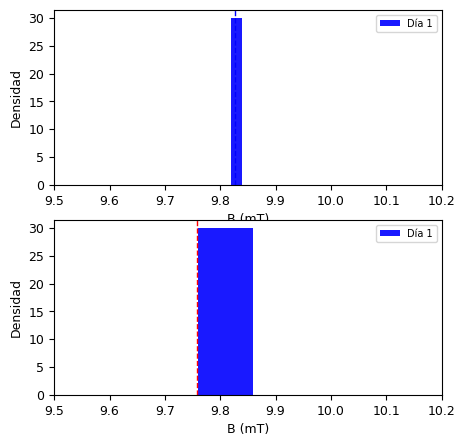

In [10]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(5, 5))  
bins = 1

#ax.hist(campos_magneticos, bins = bins, label = "Ambos Días Ajustado Día 1", color='green', alpha=0.9, density = False)
df_B_dia1 = pd.DataFrame(valores_cercanos_dia1['B Absoluto (mT)'].to_numpy())
mean_dia1 = np.mean(campos_magneticos[0:140])
df_B_dia1 = pd.DataFrame(valores_cercanos_dia2['B Absoluto (mT)'].to_numpy())
mean_dia2 = np.mean(campos_magneticos[140:420])
#sns.histplot(df_B_dia1, kde=True, label = "Día 1", ax = ax1)
#sns.histplot(df_B_dia2, kde=True, label = "Día 2", ax = ax2)
ax1.hist(valores_cercanos_dia1['B Absoluto (mT)'].to_numpy(), bins = 1, label = "Día 1", color='blue', alpha=0.9, density = False)
ax2.hist(valores_cercanos_dia2['B Absoluto (mT)'].to_numpy(), bins =  10, label = "Día 1", color='blue', alpha=0.9, density = False)

ax1.axvline(mean_dia1, color='blue', linestyle='dashed', linewidth=1)
ax2.axvline(mean_dia2, color='red', linestyle='dashed', linewidth=1)

for ax in [ax1, ax2]:
    ax.set_xlabel('B (mT)', fontsize=9)
    ax.set_ylabel('Densidad', fontsize=9)
    ax.set_xlim(9.5, 10.2)
    ax.tick_params(axis='both', which='major', labelsize=9)
    ax.tick_params(axis='both', which='minor', labelsize=9)
    ax.legend(loc='upper right', fontsize=7)

#plt.savefig('hist.png', dpi=500)  # Guardar con alta resolución

In [18]:
#Ordenar de ID mas bajo al mas grande
ordenados_1 = valores_cercanos_dia1['Magnet ID'].sort_values()
ordenados_2 = valores_cercanos_dia2['Magnet ID'].sort_values()  

# Extraer la columna 'Magnet ID'
magnet_ids_1 = ordenados_1.tolist()
magnet_ids_2 = ordenados_2.tolist()


# Crear el contenido del archivo TXT
txt_content_1 = f"var = {magnet_ids_1}"
txt_content_2 = f"var = {magnet_ids_2}"

# Guardar en un archivo TXT
file_path = "magnet_ids_1.txt"
with open(file_path, "w") as file:
    file.write(txt_content_1)

# Guardar en un archivo TXT
file_path = "magnet_ids_2.txt"
with open(file_path, "w") as file:
    file.write(txt_content_2)

In [19]:
valores_cercanos_dia2

,Station N.,Date,Time,Magnet ID,B (mT),Zero (mT),Numero de Caja,B Absoluto (mT),Dia Medido
145,1,Thu Jan 9 2025,09:59:45,176,9.52,6.16,A1,9.76,2
146,1,Thu Jan 9 2025,10:00:21,177,9.52,6.16,A1,9.76,2
174,1,Thu Jan 9 2025,10:41:53,205,9.52,6.16,A2,9.76,2
187,1,Thu Jan 9 2025,11:04:47,218,9.52,6.16,A3,9.76,2
192,1,Thu Jan 9 2025,11:09:42,223,9.52,6.16,A3,9.76,2
193,1,Thu Jan 9 2025,11:10:24,224,9.52,6.16,A3,9.76,2
211,1,Thu Jan 9 2025,11:31:15,242,9.52,6.16,A4,9.76,2
226,1,Thu Jan 9 2025,11:46:46,257,9.52,6.16,A5,9.76,2
237,1,Thu Jan 9 2025,11:52:27,268,9.52,6.16,A5,9.76,2
243,1,Thu Jan 9 2025,11:56:32,274,9.52,6.16,A6,9.76,2
